In [8]:
import pandas as pd
import os

In [9]:
def load_data(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            f = open(directory + filename, "r", encoding='utf-8')
            Lines = f.readlines()
            f.close()
            temp = pd.DataFrame()
            temp["text"] = Lines
            temp["project_name"] = filename
            temp = temp.drop(temp[temp["text"] == "\n"].index).reset_index(drop=True)
            dfs.append(temp)
    
    data = pd.DataFrame(columns=["text", "project_name"])

    for p in dfs:
        data = pd.concat([data, p], axis=0)
    data = data.reset_index(inplace=False)[["text", "project_name"]]
    data['text'] = data[data.text.str.endswith("\n")]['text'].str[:-2]
    data = clean_set_indicator(data)
    return data


def clean_set_indicator(data):
    for s in ["train", "validation", "test"]:
        data.project_name = data.project_name.str.replace(f"_{s}","")
    return data

In [12]:
data = load_data("github_data/train_set/")

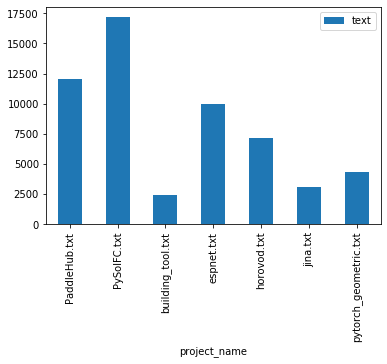

In [19]:
data.drop_duplicates().groupby("project_name").count().plot(kind='bar')